In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
import tensorflow_probability as tfp
import time  
from scipy.optimize import curve_fit
import compare
import csv
from scipy import stats

DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\fp-solvers


<IPython.core.display.Javascript object>


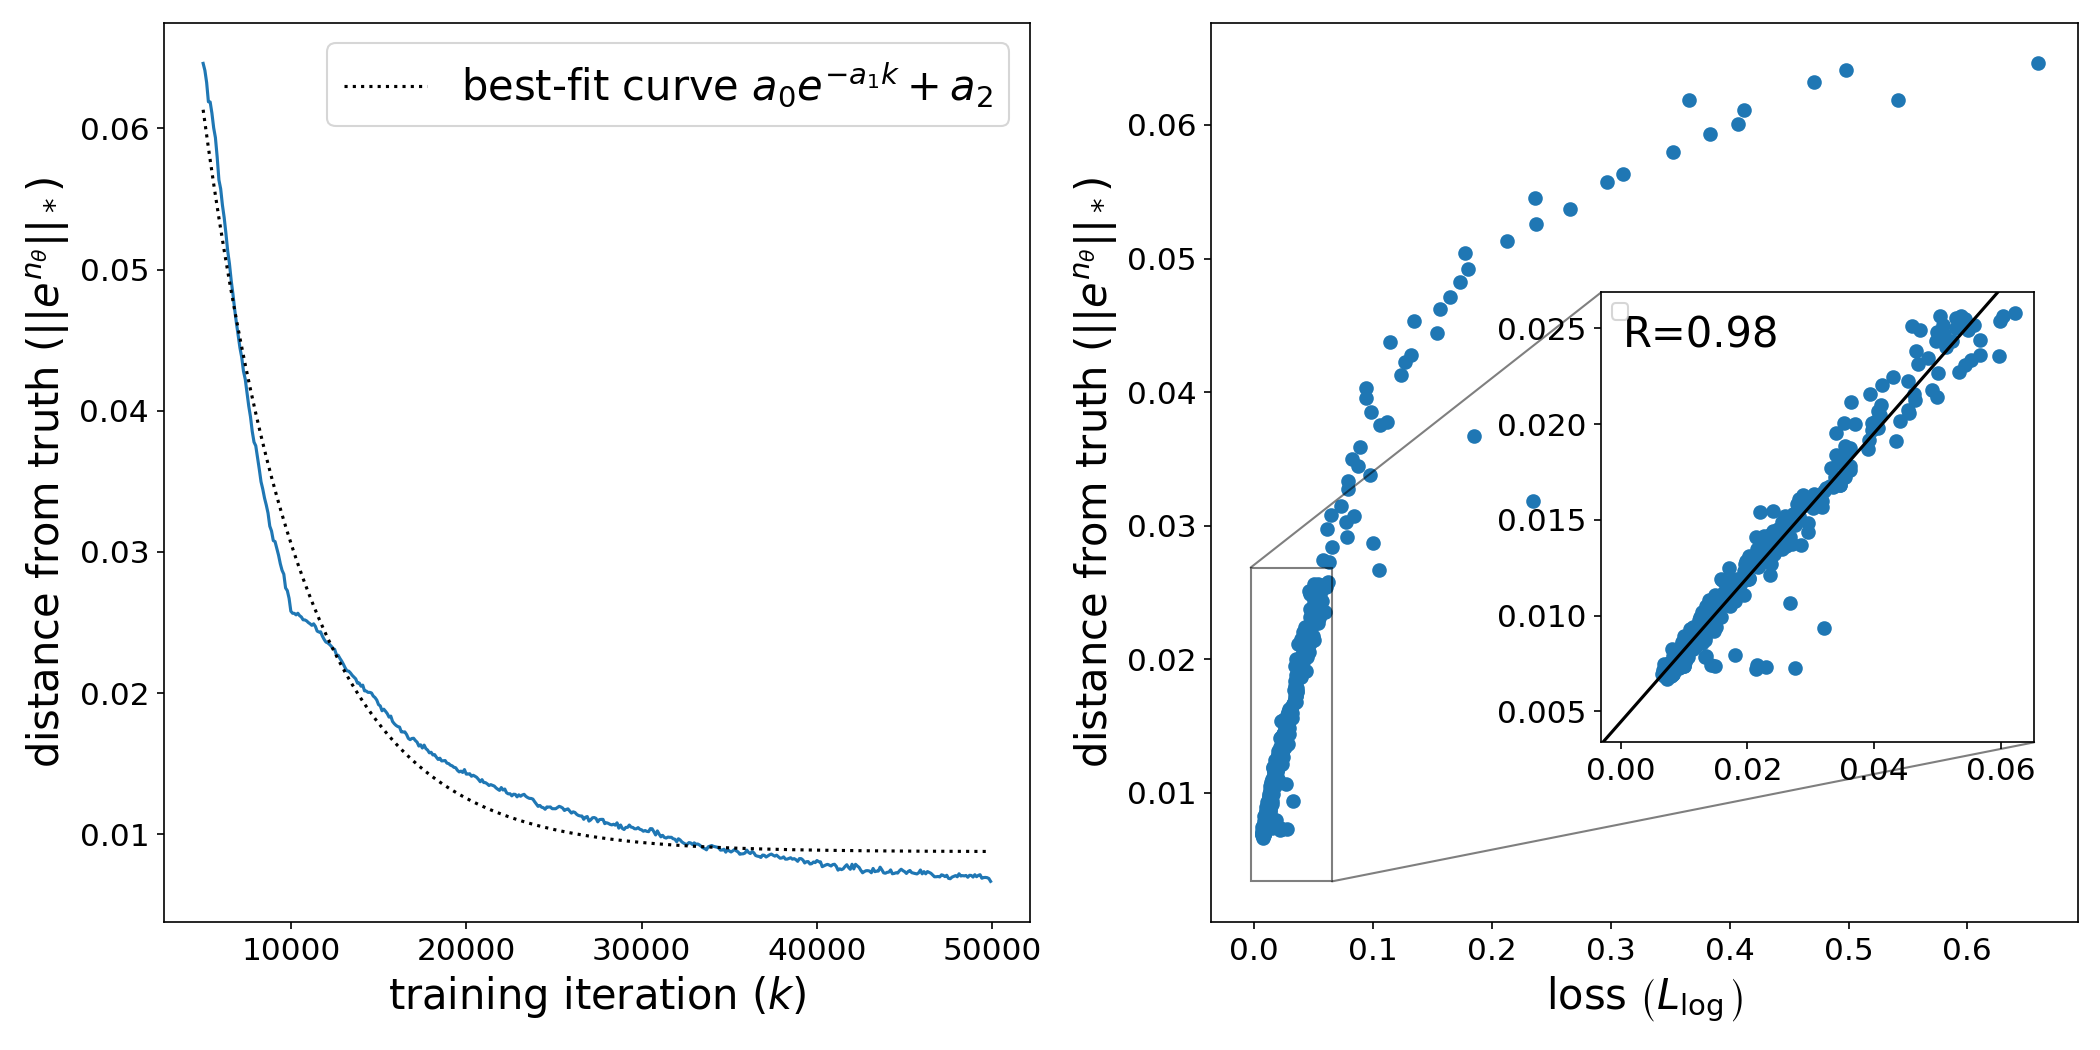

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Time taken by this cell is 0.21979665756225586 seconds


In [9]:
# set up plotting parameters
scale = 5
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale

start = time.time()
# load data
net_path='../circle-fp/data/2D-true-vs-learned'
steps = np.array(list(range(5000, 50000, 100))) 
df = pd.read_csv('{}/distance.csv'.format(net_path))
distance = df['distance'].to_numpy().astype(DTYPE)
log = np.genfromtxt('{}/train_log.csv'.format(net_path), delimiter=',')
# extract loss data
loss, k = [], 0
for row in log:
    if int(row[0]) == steps[k]:
        loss.append(row[1])
        k += 1
    if k == len(steps):
        break
def func(x, a, b, c):
    return a * np.exp(-b * x / 10000) + c
popt, pcov = curve_fit(func, steps, distance, maxfev=10000, p0=[1, 1, 0.1])
k = 50
m, b = np.polyfit(loss[k:], distance[k:], deg=1)

fig = plt.figure(figsize=(14, 7))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122)
ax_inset = ax_right.inset_axes([0.45, 0.2, 0.5, 0.5])
ax_left.tick_params(axis='both', which='major', labelsize=tick_size)
ax_left.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_right.tick_params(axis='both', which='major', labelsize=tick_size)
ax_right.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_inset.tick_params(axis='both', which='major', labelsize=tick_size)
ax_inset.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_left.plot(steps, distance)


ax_left.plot(steps[0:], func(steps[0:], *popt),\
             label=r'best-fit curve $a_0e^{-a_1k}+a_2$', c='black', linestyle="dotted")
ax_right.scatter(loss, distance)


ax_inset.scatter(loss[k:], distance[k:])
r = stats.pearsonr(loss[k:], distance[k:])
ax_inset.axline(xy1=(0, b), slope=m, c='black')
                #label=r'best-fit line $b_0L_{\log}+b_1$', linestyle="solid")
ax_inset.text(0.05, 0.95, 'R={:.2f}'.format(r[0]), transform=ax_inset.transAxes, fontsize=legend_size,
        verticalalignment='top')
ax_left.set_ylabel(r'distance from truth $(||e^{n_\theta}||_*)$', fontsize=ylabel_size)
ax_left.set_xlabel(r'training iteration $(k)$', fontsize=xlabel_size)
ax_right.set_ylabel(r'distance from truth $(||e^{n_\theta}||_*)$', fontsize=ylabel_size)
ax_right.set_xlabel(r'loss $\left(L_{\log}\right)$', fontsize=xlabel_size)
ax_inset.legend(fontsize=legend_size-10)
ax_right.indicate_inset_zoom(ax_inset, edgecolor="black")
ax_left.legend(fontsize=legend_size)
#fig.subplots_adjust(wspace=0.5, hspace=0.4)
plt.tight_layout()
plt.savefig('../plots/2D-distance.png')
end = time.time()
print('Time taken by this cell is {} seconds'.format(end - start))

In [ ]:
popt, pcov = curve_fit(func, steps, distance, maxfev=10000, p0=[1, 1, 0.1])

In [ ]:
func

In [ ]:
df['distance']